C:\Users\SEJAL\AppData\Local\Temp\ipykernel_416\2975988926.py:21: UserWarning: Parsing dates in %d/%m/%Y %H:%M:%S format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['Datetime'] = pd.to_datetime(df['Date'] + ' ' + df['Time'])
c:\Users\SEJAL\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/100
15/15 - 3s - 200ms/step - loss: 0.1680
Epoch 2/100
15/15 - 0s - 11ms/step - loss: 0.1393
Epoch 3/100
15/15 - 0s - 7ms/step - loss: 0.1134
Epoch 4/100
15/15 - 0s - 7ms/step - loss: 0.0960
Epoch 5/100
15/15 - 0s - 7ms/step - loss: 0.0830
Epoch 6/100
15/15 - 0s - 6ms/step - loss: 0.0742
Epoch 7/100
15/15 - 0s - 5ms/step - loss: 0.0711
Epoch 8/100
15/15 - 0s - 6ms/step - loss: 0.0661
Epoch 9/100
15/15 - 0s - 6ms/step - loss: 0.0654
Epoch 10/100
15/15 - 0s - 7ms/step - loss: 0.0639
Epoch 11/100
15/15 - 0s - 6ms/step - loss: 0.0643
Epoch 12/100
15/15 - 0s - 7ms/step - loss: 0.0627
Epoch 13/100
15/15 - 0s - 7ms/step - loss: 0.0624
Epoch 14/100
15/15 - 0s - 7ms/step - loss: 0.0642
Epoch 15/100
15/15 - 0s - 7ms/step - loss: 0.0619
Epoch 16/100
15/15 - 0s - 6ms/step - loss: 0.0622
Epoch 17/100
15/15 - 0s - 7ms/step - loss: 0.0617
Epoch 18/100
15/15 - 0s - 7ms/step - loss: 0.0610
Epoch 19/100
15/15 - 0s - 7ms/step - loss: 0.0609
Epoch 20/100
15/15 - 0s - 7ms/step - loss: 0.0623
Epoch 

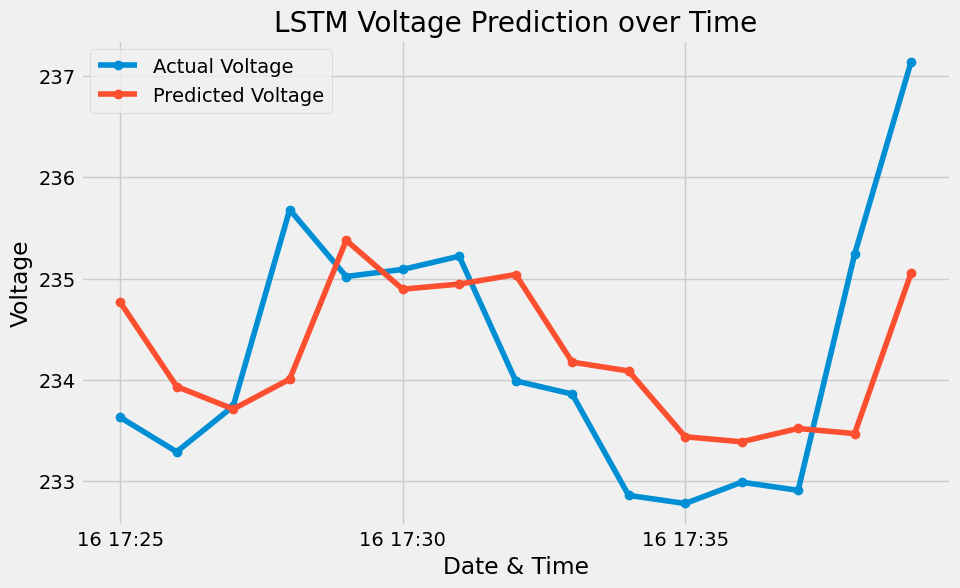

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Load the dataset
data = {
    'Date': ['16/12/2006']*16,
    'Time': ['17:24:00', '17:25:00', '17:26:00', '17:27:00', '17:28:00', '17:29:00', 
             '17:30:00', '17:31:00', '17:32:00', '17:33:00', '17:34:00', '17:35:00', 
             '17:36:00', '17:37:00', '17:38:00', '17:39:00'],
    'Voltage': [234.84, 233.63, 233.29, 233.74, 235.68, 235.02, 235.09, 235.22, 233.99, 
                233.86, 232.86, 232.78, 232.99, 232.91, 235.24, 237.14]
}

df = pd.DataFrame(data)

# Combine date and time into a single datetime column
df['Datetime'] = pd.to_datetime(df['Date'] + ' ' + df['Time'])
df.set_index('Datetime', inplace=True)
df.drop(['Date', 'Time'], axis=1, inplace=True)

# Normalize the data
scaler = MinMaxScaler()
df['Voltage'] = scaler.fit_transform(df['Voltage'].values.reshape(-1, 1))

# Prepare data for LSTM
def create_dataset(data, look_back=1):
    X, Y = [], []
    for i in range(len(data) - look_back):
        X.append(data[i:(i + look_back)])
        Y.append(data[i + look_back])
    return np.array(X), np.array(Y)

look_back = 1
X, y = create_dataset(df['Voltage'].values, look_back)

# Reshape input to be [samples, time steps, features]
X = np.reshape(X, (X.shape[0], X.shape[1], 1))

# Create the LSTM model
model = Sequential()
model.add(LSTM(50, input_shape=(X.shape[1], X.shape[2])))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

# Train the model
model.fit(X, y, epochs=100, batch_size=1, verbose=2)

# Predict the values
predicted = model.predict(X)

# Inverse transform to get actual values
predicted = scaler.inverse_transform(predicted)
y = scaler.inverse_transform(y.reshape(-1, 1))

# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(df.index[look_back:], y, label='Actual Voltage',marker='o')
plt.plot(df.index[look_back:], predicted, label='Predicted Voltage',marker='o')
plt.xlabel('Date & Time')
plt.ylabel('Voltage')
plt.title('LSTM Voltage Prediction over Time')
plt.legend()
plt.show()



C:\Users\SEJAL\AppData\Local\Temp\ipykernel_416\1761419635.py:28: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data.fillna(method='ffill', inplace=True)  # Forward fill for missing values


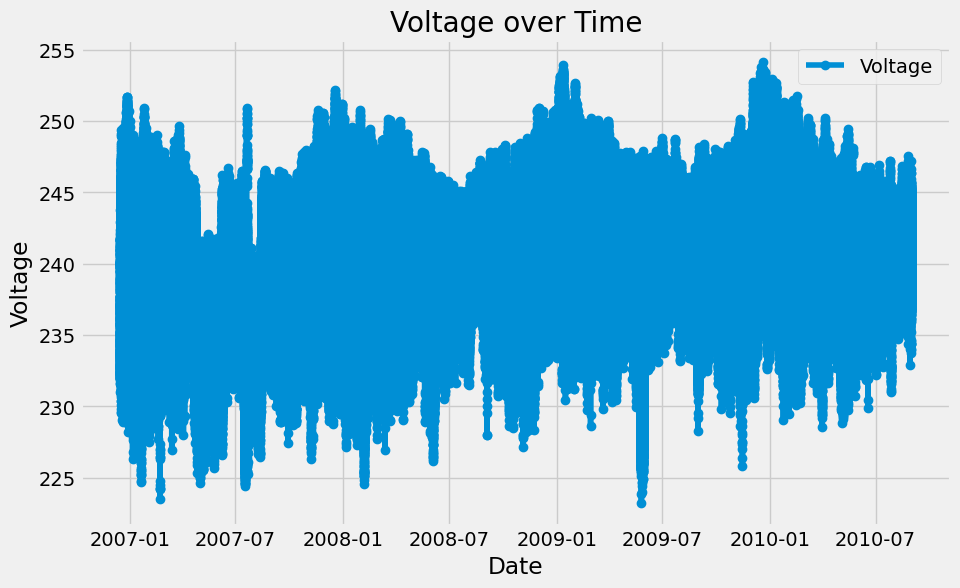

In [6]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

# Load the dataset
data = pd.read_csv('Test2.csv')

# Convert 'Date' and 'Time' to datetime format
data['Date'] = pd.to_datetime(data['Date'], format='%d/%m/%Y', errors='coerce')
data['Time'] = pd.to_datetime(data['Time'], format='%H:%M:%S', errors='coerce').dt.time

# Drop the 'Time' column if it's not needed
data.drop(columns=['Time'], inplace=True)

# Set the 'Date' column as the index if time-series modeling is desired
data.set_index('Date', inplace=True)

# Ensure 'Voltage' column is numeric; convert if necessary
data['Voltage'] = pd.to_numeric(data['Voltage'], errors='coerce')

# Handle any missing values created during conversion
data.fillna(method='ffill', inplace=True)  # Forward fill for missing values

# Define features (X) and target (y)
x = data.index  # Dates for plotting on x-axis
y = data['Voltage'].values  # Voltage values, converted to NumPy array

# Ensure target is numeric
y = np.nan_to_num(y)  # Replace NaNs with zero or handle accordingly

# Plot the actual voltage over time
plt.figure(figsize=(10, 6))
plt.plot(x, y, label='Voltage',marker='o')
plt.xlabel('Date')
plt.ylabel('Voltage')
plt.title('Voltage over Time')
plt.legend()
plt.show()


In [10]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

# Load the dataset
data = pd.read_csv('Test2.csv')

# Convert 'Date' and 'Time' to datetime format
data['Date'] = pd.to_datetime(data['Date'], format='%d/%m/%Y', errors='coerce')
data['Time'] = pd.to_datetime(data['Time'], format='%H:%M:%S', errors='coerce').dt.time

# Drop the 'Time' column if it's not needed
data.drop(columns=['Time'], inplace=True)

# Set the 'Date' column as the index for time-series modeling
data.set_index('Date', inplace=True)

# Ensure 'Voltage' column is numeric; convert if necessary
data['Voltage'] = pd.to_numeric(data['Voltage'], errors='coerce')

# Handle any missing values created during conversion
data.fillna(method='ffill', inplace=True)  # Forward fill for missing values

# Normalize the data using MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
data['Voltage'] = scaler.fit_transform(data['Voltage'].values.reshape(-1, 1))

# Prepare the dataset for LSTM
def create_dataset(data, time_step=1):
    X, Y = [], []
    for i in range(len(data) - time_step - 1):
        a = data[i:(i + time_step)]  # Corrected: Now accessing the data properly
        X.append(a)
        Y.append(data[i + time_step])
    return np.array(X), np.array(Y)

# Specify the time step (window size)
time_step = 10  # Can be adjusted depending on how much past data you want to use for prediction
X, y = create_dataset(data['Voltage'].values, time_step)

# Reshape the data for LSTM [samples, timesteps, features]
X = X.reshape(X.shape[0], X.shape[1], 1)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build the LSTM model
model = Sequential()
model.add(LSTM(50, input_shape=(X_train.shape[1], 1), activation='relu'))
model.add(Dense(1))  # Output layer for regression

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))

# Make predictions
y_pred = model.predict(X_test)

# Inverse transform the predictions back to the original scale
y_test = scaler.inverse_transform(y_test.reshape(-1, 1))
y_pred = scaler.inverse_transform(y_pred)

# Plot the actual vs predicted values
plt.figure(figsize=(10, 6))
plt.plot(y_test, label='Actual Voltage', marker='o')
plt.plot(y_pred, label='Predicted Voltage', marker='x')
plt.xlabel('Time')
plt.ylabel('Voltage')
plt.title('Voltage: Actual vs. Predicted')
plt.legend()
plt.show()


KeyboardInterrupt: 

Epoch 1/100


C:\Users\SEJAL\AppData\Local\Temp\ipykernel_1300\3855919261.py:22: UserWarning: Parsing dates in %d/%m/%Y %H:%M:%S format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['Datetime'] = pd.to_datetime(df['Date'] + ' ' + df['Time'])
c:\Users\SEJAL\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


15/15 - 2s - 160ms/step - loss: 0.1677
Epoch 2/100
15/15 - 0s - 5ms/step - loss: 0.1423
Epoch 3/100
15/15 - 0s - 5ms/step - loss: 0.1197
Epoch 4/100
15/15 - 0s - 5ms/step - loss: 0.1032
Epoch 5/100
15/15 - 0s - 5ms/step - loss: 0.0874
Epoch 6/100
15/15 - 0s - 5ms/step - loss: 0.0788
Epoch 7/100
15/15 - 0s - 6ms/step - loss: 0.0714
Epoch 8/100
15/15 - 0s - 7ms/step - loss: 0.0679
Epoch 9/100
15/15 - 0s - 6ms/step - loss: 0.0662
Epoch 10/100
15/15 - 0s - 6ms/step - loss: 0.0648
Epoch 11/100
15/15 - 0s - 6ms/step - loss: 0.0641
Epoch 12/100
15/15 - 0s - 6ms/step - loss: 0.0637
Epoch 13/100
15/15 - 0s - 6ms/step - loss: 0.0633
Epoch 14/100
15/15 - 0s - 6ms/step - loss: 0.0629
Epoch 15/100
15/15 - 0s - 6ms/step - loss: 0.0637
Epoch 16/100
15/15 - 0s - 6ms/step - loss: 0.0632
Epoch 17/100
15/15 - 0s - 6ms/step - loss: 0.0636
Epoch 18/100
15/15 - 0s - 6ms/step - loss: 0.0618
Epoch 19/100
15/15 - 0s - 5ms/step - loss: 0.0615
Epoch 20/100
15/15 - 0s - 6ms/step - loss: 0.0618
Epoch 21/100
15/15 

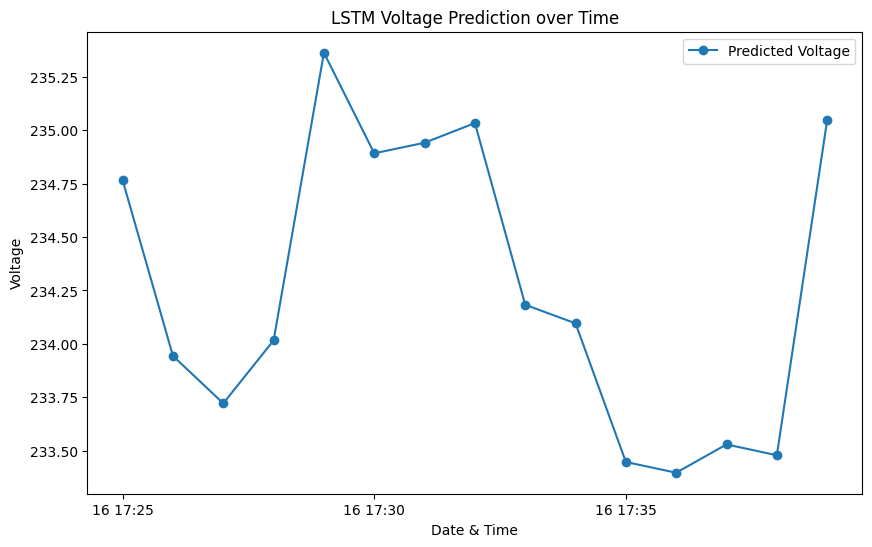

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential  #type:ignore
from tensorflow.keras.layers import LSTM, Dense #type:ignore

# Load the dataset
data = {
    'Date': ['16/12/2006']*16,
    'Time': ['17:24:00', '17:25:00', '17:26:00', '17:27:00', '17:28:00', '17:29:00', 
             '17:30:00', '17:31:00', '17:32:00', '17:33:00', '17:34:00', '17:35:00', 
             '17:36:00', '17:37:00', '17:38:00', '17:39:00'],
    'Voltage': [234.84, 233.63, 233.29, 233.74, 235.68, 235.02, 235.09, 235.22, 233.99, 
                233.86, 232.86, 232.78, 232.99, 232.91, 235.24, 237.14]
}

df = pd.DataFrame(data)

# Combine date and time into a single datetime column
df['Datetime'] = pd.to_datetime(df['Date'] + ' ' + df['Time'])
df.set_index('Datetime', inplace=True)
df.drop(['Date', 'Time'], axis=1, inplace=True)

# Normalize the data
scaler = MinMaxScaler()
df['Voltage'] = scaler.fit_transform(df['Voltage'].values.reshape(-1, 1))

# Prepare data for LSTM
def create_dataset(data, look_back=1):
    X, Y = [], []
    for i in range(len(data) - look_back):
        X.append(data[i:(i + look_back)])
        Y.append(data[i + look_back])
    return np.array(X), np.array(Y)

look_back = 1
X, y = create_dataset(df['Voltage'].values, look_back)

# Reshape input to be [samples, time steps, features]
X = np.reshape(X, (X.shape[0], X.shape[1], 1))

# Create the LSTM model
model = Sequential()
model.add(LSTM(50, input_shape=(X.shape[1], X.shape[2])))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

# Train the model
model.fit(X, y, epochs=100, batch_size=1, verbose=2)

# Predict the values
predicted = model.predict(X)

# Inverse transform to get actual values
predicted = scaler.inverse_transform(predicted)

# Plotting only the predicted results
plt.figure(figsize=(10, 6))
plt.plot(df.index[look_back:], predicted, label='Predicted Voltage', marker='o')
plt.xlabel('Date & Time')
plt.ylabel('Voltage')
plt.title('LSTM Voltage Prediction over Time')
plt.legend()
plt.show()


###dumping model

In [14]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import pickle

# Load the dataset
data = pd.read_csv('Test2.csv')

# Convert 'Date' and 'Time' to datetime format
data['Date'] = pd.to_datetime(data['Date'], format='%d/%m/%Y', errors='coerce')
data['Time'] = pd.to_datetime(data['Time'], format='%H:%M:%S', errors='coerce').dt.time

# Drop the 'Time' column if it's not needed
data.drop(columns=['Time'], inplace=True)

# Set the 'Date' column as the index for time-series modeling
data.set_index('Date', inplace=True)

# Ensure 'Voltage' column is numeric; convert if necessary
data['Voltage'] = pd.to_numeric(data['Voltage'], errors='coerce')

# Handle any missing values created during conversion
data.fillna(method='ffill', inplace=True)  # Forward fill for missing values

# Normalize the data using MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
data['Voltage'] = scaler.fit_transform(data['Voltage'].values.reshape(-1, 1))

# Prepare the dataset for LSTM
def create_dataset(data, time_step=1):
    X, Y = [], []
    for i in range(len(data) - time_step - 1):
        a = data[i:(i + time_step)]  # Corrected: Now accessing the data properly
        X.append(a)
        Y.append(data[i + time_step])
    return np.array(X), np.array(Y)

# Specify the time step (window size)
time_step = 10  # Can be adjusted depending on how much past data you want to use for prediction
X, y = create_dataset(data['Voltage'].values, time_step)

# Reshape the data for LSTM [samples, timesteps, features]
X = X.reshape(X.shape[0], X.shape[1], 1)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build the LSTM model
model = Sequential()
model.add(LSTM(50, input_shape=(X_train.shape[1], 1), activation='relu'))
model.add(Dense(1))  # Output layer for regression

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))

# Save the model using pickle
with open('lstm_voltage_model.pkl', 'wb') as file:
    pickle.dump(model, file)

# Save the scaler to ensure future data is scaled the same way
with open('scaler.pkl', 'wb') as file:
    pickle.dump(scaler, file)

# To use the model for future predictions, load it back using pickle
with open('lstm_voltage_model.pkl', 'rb') as file:
    loaded_model = pickle.load(file)

with open('scaler.pkl', 'rb') as file:
    loaded_scaler = pickle.load(file)

# Make predictions with the loaded model
y_pred = loaded_model.predict(X_test)

# Inverse transform the predictions back to the original scale
y_test = loaded_scaler.inverse_transform(y_test.reshape(-1, 1))
y_pred = loaded_scaler.inverse_transform(y_pred)

# Plot the actual vs predicted values
plt.figure(figsize=(10, 6))
plt.plot(y_test, label='Actual Voltage', marker='o')
plt.plot(y_pred, label='Predicted Voltage', marker='x')
plt.xlabel('Time')
plt.ylabel('Voltage')
plt.title('Voltage: Actual vs. Predicted')
plt.legend()
plt.show()


C:\Users\SEJAL\AppData\Local\Temp\ipykernel_416\25127544.py:29: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data.fillna(method='ffill', inplace=True)  # Forward fill for missing values
c:\Users\SEJAL\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
48754/48754 ━━━━━━━━━━━━━━━━━━━━ 343s 7ms/step - loss: 0.0020 - val_loss: 3.7637e-04
Epoch 2/50
48754/48754 ━━━━━━━━━━━━━━━━━━━━ 326s 7ms/step - loss: 3.7141e-04 - val_loss: 3.6497e-04
Epoch 3/50
48754/48754 ━━━━━━━━━━━━━━━━━━━━ 241s 5ms/step - loss: 3.7099e-04 - val_loss: 3.9706e-04
Epoch 4/50
48754/48754 ━━━━━━━━━━━━━━━━━━━━ 233s 5ms/step - loss: 3.6876e-04 - val_loss: 3.5993e-04
Epoch 5/50
48754/48754 ━━━━━━━━━━━━━━━━━━━━ 245s 5ms/step - loss: 3.6817e-04 - val_loss: 3.8791e-04
Epoch 6/50
48754/48754 ━━━━━━━━━━━━━━━━━━━━ 293s 6ms/step - loss: 3.6745e-04 - val_loss: 3.7463e-04
Epoch 7/50
48754/48754 ━━━━━━━━━━━━━━━━━━━━ 375s 8ms/step - loss: 3.6656e-04 - val_loss: 3.5967e-04
Epoch 8/50
48754/48754 ━━━━━━━━━━━━━━━━━━━━ 368s 7ms/step - loss: 3.6540e-04 - val_loss: 3.6407e-04
Epoch 9/50
48754/48754 ━━━━━━━━━━━━━━━━━━━━ 343s 7ms/step - loss: 3.6491e-04 - val_loss: 3.5894e-04
Epoch 10/50
48754/48754 ━━━━━━━━━━━━━━━━━━━━ 311s 6ms/step - loss: 3.6608e-04 - val_loss: 3.6516e-04
Epo

KeyboardInterrupt: 